In [23]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [4]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

#### Logistic regression hypothesis
#### $$ h_{\theta}(x) = g(\theta^{T}x)$$
#### $$ g(z)=\frac{1}{1+e^{−z}} $$

In [5]:
data = loaddata("ex2data1.txt", ",")

Dimensions:  (100, 3)
[[ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


In [21]:
X = np.c_[np.ones((data.shape[0])),data[:,:2]]
y = np.c_[data[:,2:]]

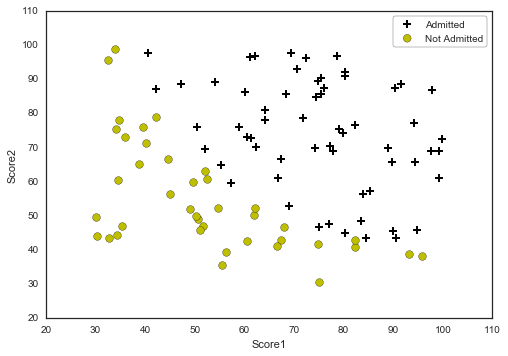

In [29]:
neg = data[:,2]==0
pos = data[:,2]==1
axes = plt.gca()
axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label="Admitted")
axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label="Not Admitted")
axes.set_xlabel("Score1")
axes.set_ylabel("Score2")
axes.legend(frameon= True, fancybox = True);

In [31]:
import scipypy

In [32]:
scipy.special.expit

<ufunc 'expit'>

#### Cost Function
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
#### Vectorized Cost Function
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

In [37]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [38]:
def costFunction(theta, X, y):
    m = y.size
    h = scipy.special.expit(X.dot(theta))
#     Instead use sigmoid function defined above
    J = (-1/m)*(np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y))
    if np.isnan(J[0]):
        return np.inf
    return J[0]

In [43]:
def gradient(theta, X, y):
    m = y.size
    h = scipy.special.expit(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

In [44]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.69314718056
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


In [46]:
initial_theta = np.zeros(X.shape[1])
initial_theta

array([ 0.,  0.,  0.])

In [55]:
initial_theta.reshape(-1,1)

array([[ 0.],
       [ 0.],
       [ 0.]])